In [424]:
import pandas as pd
import numpy as np

In [425]:
df=pd.read_csv("../Datasets/Dataset1.csv")

In [426]:
df.shape

(4424, 35)

In [427]:
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

In [428]:
df.info()
df['Target'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [429]:
attendance=[]
for s in df['Target']:
    if s=='Dropout':
        val=np.random.normal(60,9)
    elif s=='Graduate':
        val=np.random.normal(85,7)
    else:
        val=np.random.normal(75,10)
    val=np.clip(val,40,100)
    attendance.append(val)

df.insert(len(df.columns)-1,"Attendance",np.round(attendance,1))

df.sample(5)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Attendance,Target
1966,1,1,1,6,1,1,1,1,14,4,...,5,8,3,13.00000,1,9.4,-0.8,-3.12,85.3,Graduate
1952,1,1,1,2,1,1,1,13,27,8,...,0,0,0,0.00000,0,10.8,1.4,1.74,58.4,Dropout
3957,1,8,1,6,1,1,1,22,28,8,...,5,9,4,12.20000,0,9.4,-0.8,-3.12,80.5,Graduate
1115,1,9,1,12,1,1,1,23,27,10,...,8,8,8,13.11625,0,9.4,-0.8,-3.12,93.1,Graduate
3062,1,8,3,14,1,1,1,13,1,5,...,6,10,4,11.00000,0,12.7,3.7,-1.70,81.3,Dropout


In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [431]:
df['Target'].unique()

array(['Dropout', 'Graduate', 'Enrolled'], dtype=object)

In [432]:
df['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [433]:
df.select_dtypes(include = 'object')


,Target
0,Dropout
1,Graduate
2,Dropout
3,Graduate
4,Graduate
...,...
4419,Graduate
4420,Dropout
4421,Dropout
4422,Graduate


In [434]:
df['Target'] = df['Target'].map({
    'Dropout' : 1,
    'Graduate' : 0,
    'Enrolled' : 2
})


In [435]:
df['Target'].unique()

array([1, 0, 2])

In [436]:
df.corr()['Target']

Marital status                                    0.037198
Application mode                                  0.147498
Application order                                -0.080020
Course                                           -0.018190
Daytime/evening attendance                       -0.027193
Previous qualification                            0.044766
Nacionality                                       0.013989
Mother's qualification                           -0.020063
Father's qualification                           -0.030781
Mother's occupation                               0.014203
Father's occupation                               0.026185
Displaced                                        -0.068827
Educational special needs                         0.012026
Debtor                                            0.140563
Tuition fees up to date                          -0.167016
Gender                                            0.160030
Scholarship holder                               -0.2435

In [438]:
'''
To Keep

Marital status
Application mode                                 -0.110086
Daytime/evening attendance                        0.066439
Mother's occupation                               0.077593
Father's occupation                               0.094916
Curricular units 1st sem (evaluations)            0.125278
Curricular units 1st sem (approved)               0.290243
Curricular units 1st sem (grade)                  0.349652
Curricular units 2nd sem (evaluations)            0.194412
Curricular units 2nd sem (approved)               0.351135
Curricular units 2nd sem (grade)                  0.429214
Age at enrollment                                -0.201806
Debtor                                           -0.154802
Tuition fees up to date                           0.342121
Gender                                           -0.118454
Scholarship holder                                0.114517
Displaced                                         0.070649
Daytime/evening attendance                        0.066439
Attendance                                       -0.470147
Target

To remove : everything else

Curricular units 1st sem (enrolled)               0.052020
Curricular units 1st sem (credited)              -0.002464
Curricular units 1st sem (without evaluations)   -0.021565
Curricular units 2nd sem (credited)              -0.002427
Curricular units 2nd sem (enrolled)               0.060670
Curricular units 2nd sem (without evaluations)   -0.040991
Unemployment rate                                -0.037279
Inflation rate                                   -0.021798
GDP                                               0.037052
Application order                                 0.027393
Course                                           -0.009877
Nacionality                                       0.009248
Mother's qualification                           -0.071100
Father's qualification                           -0.033291
Educational special needs                         0.003751
Gender                                           -0.118454

'''

"\nTo Keep\n\nMarital status\nApplication mode                                 -0.110086\nDaytime/evening attendance                        0.066439\nMother's occupation                               0.077593\nFather's occupation                               0.094916\nCurricular units 1st sem (evaluations)            0.125278\nCurricular units 1st sem (approved)               0.290243\nCurricular units 1st sem (grade)                  0.349652\nCurricular units 2nd sem (evaluations)            0.194412\nCurricular units 2nd sem (approved)               0.351135\nCurricular units 2nd sem (grade)                  0.429214\nAge at enrollment                                -0.201806\nDebtor                                           -0.154802\nTuition fees up to date                           0.342121\nGender                                           -0.118454\nScholarship holder                                0.114517\nDisplaced                                         0.070649\nDaytime/ev

In [439]:
import matplotlib.pyplot as plt
import seaborn as sns

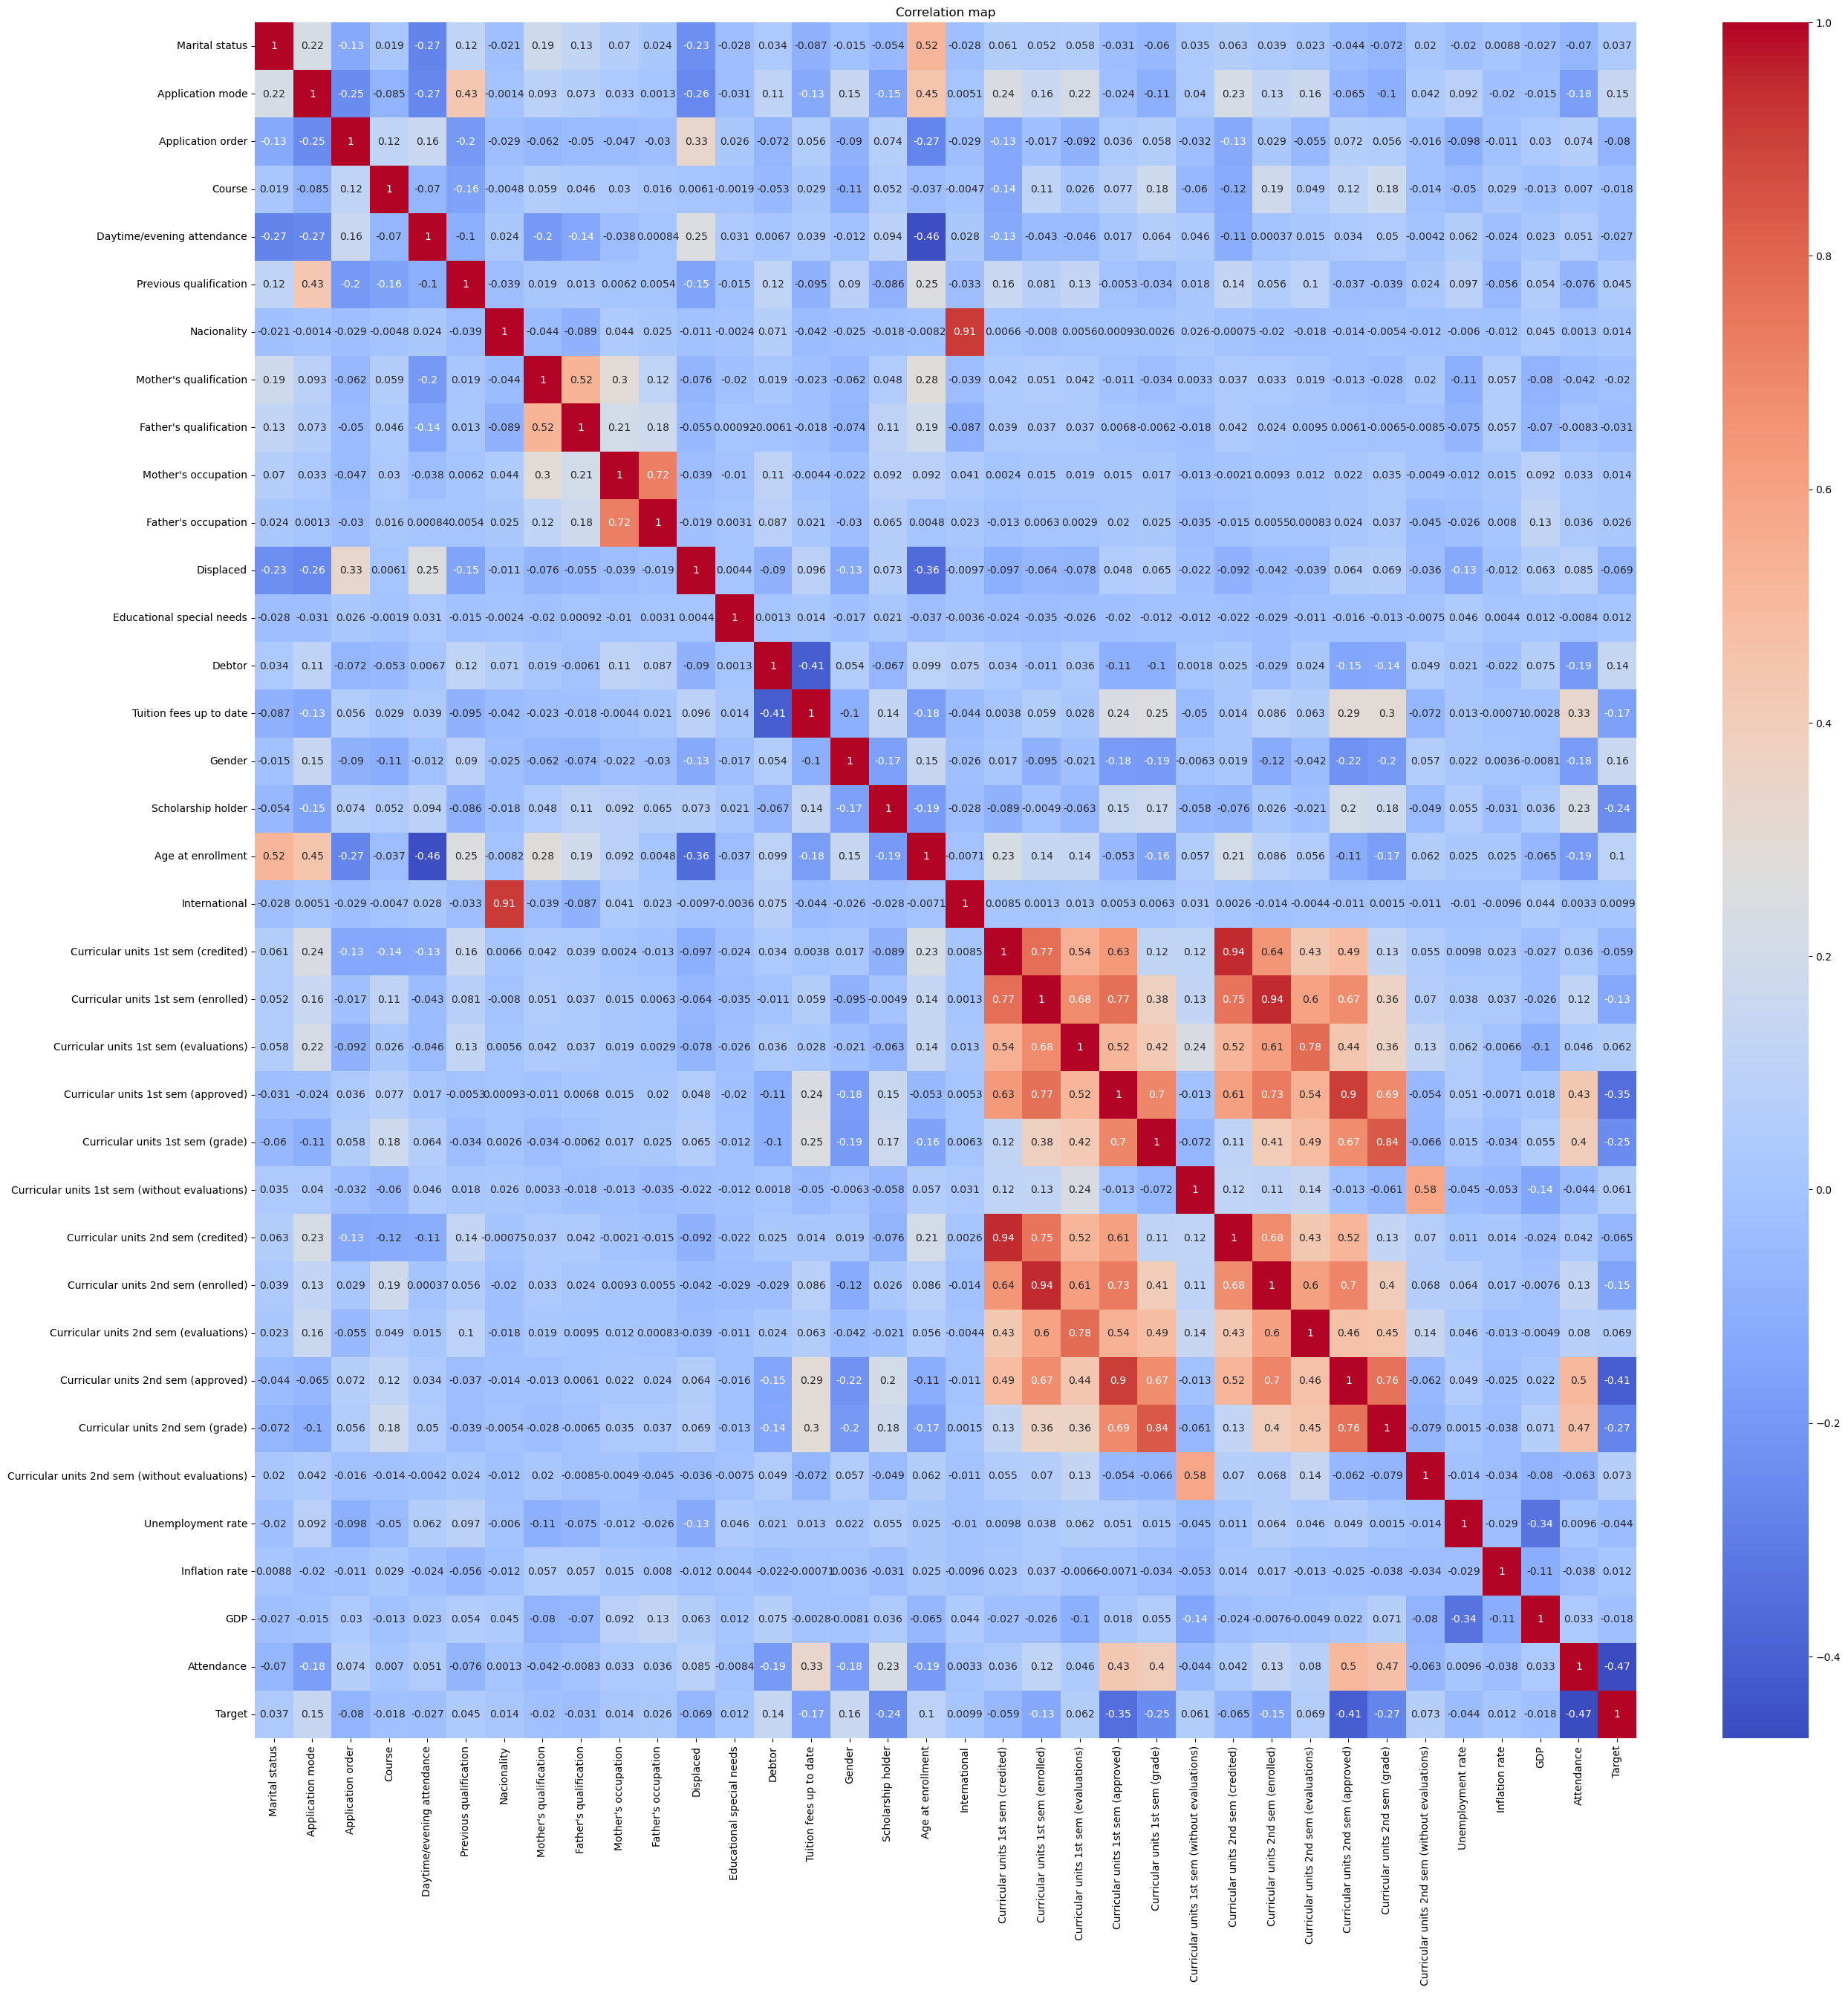

In [440]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title("Correlation map")
plt.show()

In [441]:
df.drop(columns=[
    'GDP',
    'Unemployment rate',
    'Inflation rate',
    'Nacionality',
    'Application order',
    'Course',
    "Mother's qualification",
    "Father's qualification",
    "Educational special needs",
    "Gender",
    "Curricular units 1st sem (enrolled)",
    "Curricular units 1st sem (credited)",
    "Curricular units 1st sem (without evaluations)",
    "Curricular units 2nd sem (credited)",
    "Curricular units 2nd sem (enrolled)",
    "Curricular units 2nd sem (without evaluations)",
    ],inplace=True)

In [442]:
df.shape

(4424, 20)

In [443]:
df.columns

Index(['Marital status', 'Application mode', 'Daytime/evening attendance',
       'Previous qualification', 'Mother's occupation', 'Father's occupation',
       'Displaced', 'Debtor', 'Tuition fees up to date', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Attendance', 'Target'],
      dtype='object')

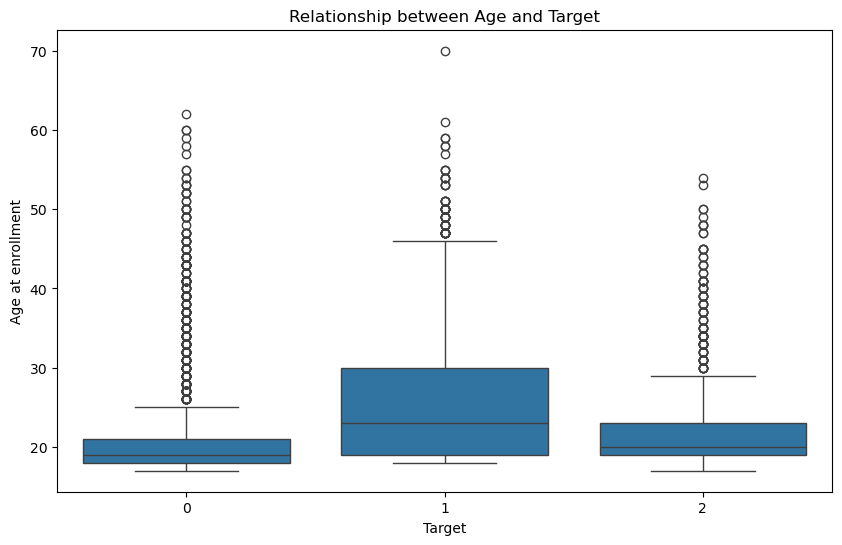

In [444]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y = 'Age at enrollment', data = df)
plt.xlabel('Target')
plt.ylabel('Age at enrollment')
plt.title('Relationship between Age and Target')
plt.show()

In [445]:
Q1=df['Age at enrollment'].quantile(0.25)

In [446]:
Q3=df['Age at enrollment'].quantile(0.75)

In [447]:
Q1

np.float64(19.0)

In [448]:
Q3

np.float64(25.0)

In [450]:
IQR=Q3-Q1

In [451]:
lower=Q1-(1.5*IQR)
upper=Q3+(1.5*IQR)

In [452]:
((df['Age at enrollment']>=lower) & (df['Age at enrollment']<=upper)).sum()
#there are 501 values which are less than LOWER limit and greater than or equal
#upper limit
#3983 values which are between the range

np.int64(3983)

In [453]:
df=df[((df['Age at enrollment']>=lower) & (df['Age at enrollment']<=upper))]

In [454]:
df.shape

(3983, 20)

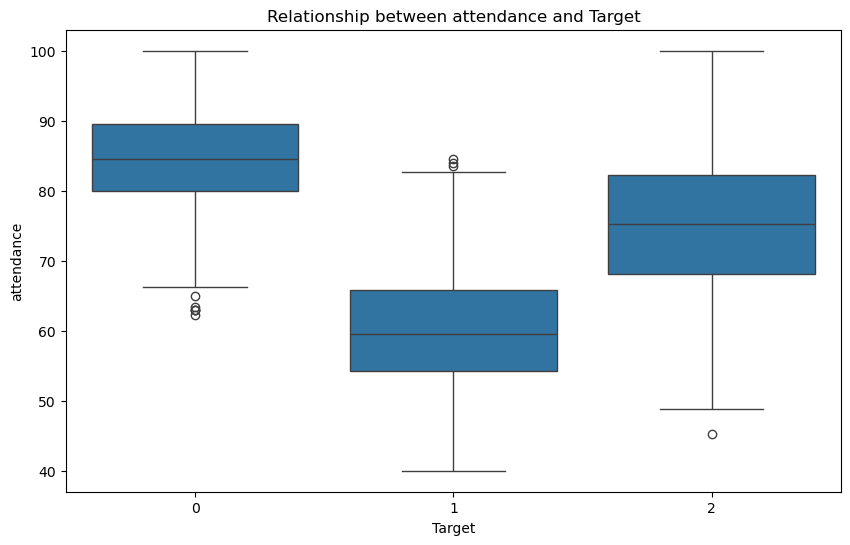

In [465]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Target', y = 'Attendance', data = df)
plt.xlabel('Target')
plt.ylabel('attendance')
plt.title('Relationship between attendance and Target')
plt.show()

In [479]:
X=df.drop(columns=["Target"])
y=df['Target']

In [468]:
X.sample(3)

,Marital status,Application mode,Daytime/evening attendance,Previous qualification,Mother's occupation,Father's occupation,Displaced,Debtor,Tuition fees up to date,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Attendance
713,1,1,1,1,3,3,0,0,1,0,18,0,8,7,13.105714,8,7,13.105714,83.5
3985,1,8,1,1,10,9,1,0,1,0,20,0,6,6,12.500000,6,6,12.666667,85.0
4089,2,14,0,10,1,1,0,0,0,0,34,0,13,3,12.000000,15,1,13.000000,48.8


In [469]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter

In [470]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

print("original shape:",X.shape)
print("Original dataset per class:",Counter(y))

original shape: (3983, 19)
Original dataset per class: Counter({0: 2057, 1: 1184, 2: 742})


In [480]:
import pandas as pd
# from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

categorical_features = [
    "Marital status",
    "Application mode",
    "Daytime/evening attendance",
    "Previous qualification",
    "Mother's occupation",
    "Father's occupation",
    "Displaced",
    "Debtor",
    "Tuition fees up to date",
    "Scholarship holder",
    "International"
]
numerical_features = [
    "Attendance",
    "Age at enrollment",
    "Curricular units 1st sem (evaluations)",
    "Curricular units 1st sem (approved)",
    "Curricular units 1st sem (grade)",
    "Curricular units 2nd sem (evaluations)",
    "Curricular units 2nd sem (approved)",
    "Curricular units 2nd sem (grade)"
]
# for numbers, we fill in the missing values and scale.
numerical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
#we fill in the missing value and then encode.
categorical_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])




preprocessor=ColumnTransformer(transformers=[
    ('num',numerical_pipeline,numerical_features),
    ('cat',categorical_pipeline,categorical_features)
],remainder='passthrough')



In [481]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
import xgboost as xgb
from imblearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_sample_weight


# sample_weights1 = compute_sample_weight(class_weight="balanced", y=y_train)

# Base learners
base_learners = [
    ('xgb', xgb.XGBClassifier(
        objective='multi:softprob', num_class=3,
        n_estimators=300, learning_rate=0.01, max_depth=5,
        subsample=0.8, colsample_bytree=0.8, eval_metric='mlogloss',
        use_label_encoder=False, random_state=42
    )),
    ('rf', RandomForestClassifier(
        n_estimators=300, max_depth=7, random_state=42
    ))
]

# Meta-learner
from sklearn.linear_model import LogisticRegression
meta_learner = LogisticRegression(multi_class='multinomial', max_iter=1000)

# Stacking
stack_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=6,  # same as your StratifiedKFold
    n_jobs=-1
)



In [482]:
pipeline=Pipeline(steps=[
    ('preprocess',preprocessor),
    ('smote',SMOTE(random_state=42)),
    ('classifier',stack_model)
])

In [493]:
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score
import pickle

pipeline.fit(x_train, y_train)
with open("dropout_prediction.pkl",'wb') as f:
    pickle.dump(pipeline,f)
print("pipeline saved!")



pipeline saved!


c:\Users\fortn\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [495]:
y_pred=pipeline.predict(x_test)
y_pred_proba=pipeline.predict_proba(x_test)

print(accuracy_score(y_test,y_pred))
print(f1_score(y_test,y_pred,average='macro'))
print(roc_auc_score(y_test,y_pred_proba,multi_class='ovr'))


0.8334728033472804
0.783785770794592
0.9320580964144565


In [496]:
print(f"predicted probabilities are:{y_pred_proba[:,0]*100}") #the actual predictions 
# made by the model

predicted probabilities are:[94.50845275  6.82529047 97.1844202  ... 90.04434679 83.53019074
 47.92720681]


In [497]:
from sklearn.metrics import classification_report
import numpy as np

# Use the probabilities for the positive class from your trained pipeline
# Assuming the positive class is the second column (index 1)
y_probabilities = pipeline.predict_proba(x_test)[:, 1]

# Get precision, recall, and thresholds
class_names = ['Dropout', 'Enrolled', 'Graduate']
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

     Dropout       0.90      0.92      0.91       617
    Enrolled       0.89      0.85      0.87       355
    Graduate       0.57      0.58      0.58       223

    accuracy                           0.83      1195
   macro avg       0.79      0.78      0.78      1195
weighted avg       0.83      0.83      0.83      1195



In [498]:
from sklearn.metrics import log_loss

# Inside your loop, after getting y_proba
# Note: log_loss uses the probability predictions, not the class labels
loss = log_loss(y_test, y_pred_proba)

In [499]:
loss

0.40956390263033454